# **Introduction**

What is Parkinson's Disease?

Parkinson's disease (PD), or simply Parkinson's is a long-term degenerative disorder of the central nervous system that mainly affects the motor system. The symptoms usually emerge slowly and, as the disease worsens, non-motor symptoms become more common. The most obvious early symptoms are tremor, rigidity, slowness of movement, and difficulty with walking,but cognitive and behavioral problems may also occur. Parkinson's disease dementia becomes common in the advanced stages of the disease. Depression and anxiety are also common, occurring in more than a third of people with PD. Other symptoms include sensory, sleep, and emotional problems. The main motor symptoms are collectively called "parkinsonism", or a "parkinsonian syndrome

![](https://camo.githubusercontent.com/be21545deabab1e7257c04182b631f6f34ebae4b/68747470733a2f2f7061726b696e736f6e736e65627261736b612e6f72672f77702d636f6e74656e742f75706c6f6164732f323032302f30332f50442d4d414e2d31303234783532322e706e67)

While Parkinson’s disease cannot be cured, early detection along with proper medication can significantly improve symptoms and quality of life, making it an important topic for research especially in the creation of new diagnostic tools.

A 2017 study by Zham et al. found that it was possible to detect Parkinson’s by asking the patient to draw a spiral and then track:

 1. Speed of drawing
 2. Pen pressure

The researchers found that the drawing speed was slower and the pen pressure lower among Parkinson’s patients — this was especially pronounced for patients with a more acute/advanced forms of the disease.

We’ll be leveraging the fact that two of the most common Parkinson’s symptoms include tremors and muscle rigidity which directly impact the visual appearance of a hand drawn spiral and wave.

The variation in visual appearance will enable us to train a computer vision + machine learning algorithm to automatically detect Parkinson’s disease.


In [1]:



from mlxtend.plotting import plot_decision_regions

#import numpy
import numpy as np

# import pandas
import pandas as pd



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

# import dataset
data = pd.read_csv('/kaggle/input/parkinson-disease-detection/Parkinsson disease.csv', delimiter=',')

In [3]:


# view the dataset data
data



,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [4]:
#data.head()

# dataset dimensions
data.shape

# generate descriptive statistics
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
# inspect the values in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
# delete the name column
data.drop(columns="name", axis=1, inplace=True)

In [7]:


# check for null values
data.isnull().sum()



MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:


data.notnull()



,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
191,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
192,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
193,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [9]:


# features
x = data.loc[:,data.columns!='status'].values[:,1:]
x1 = data.loc[:,data.columns!='status']
# label
y = data.loc[:,'status'].values
y1 = data.loc[:,'status']



In [10]:


sum(y1==0)



48

In [11]:


sum(y1==1)



147

status
0    [[Axes(0.125,0.755806;0.125x0.124194), Axes(0....
1    [[Axes(0.125,0.755806;0.125x0.124194), Axes(0....
dtype: object

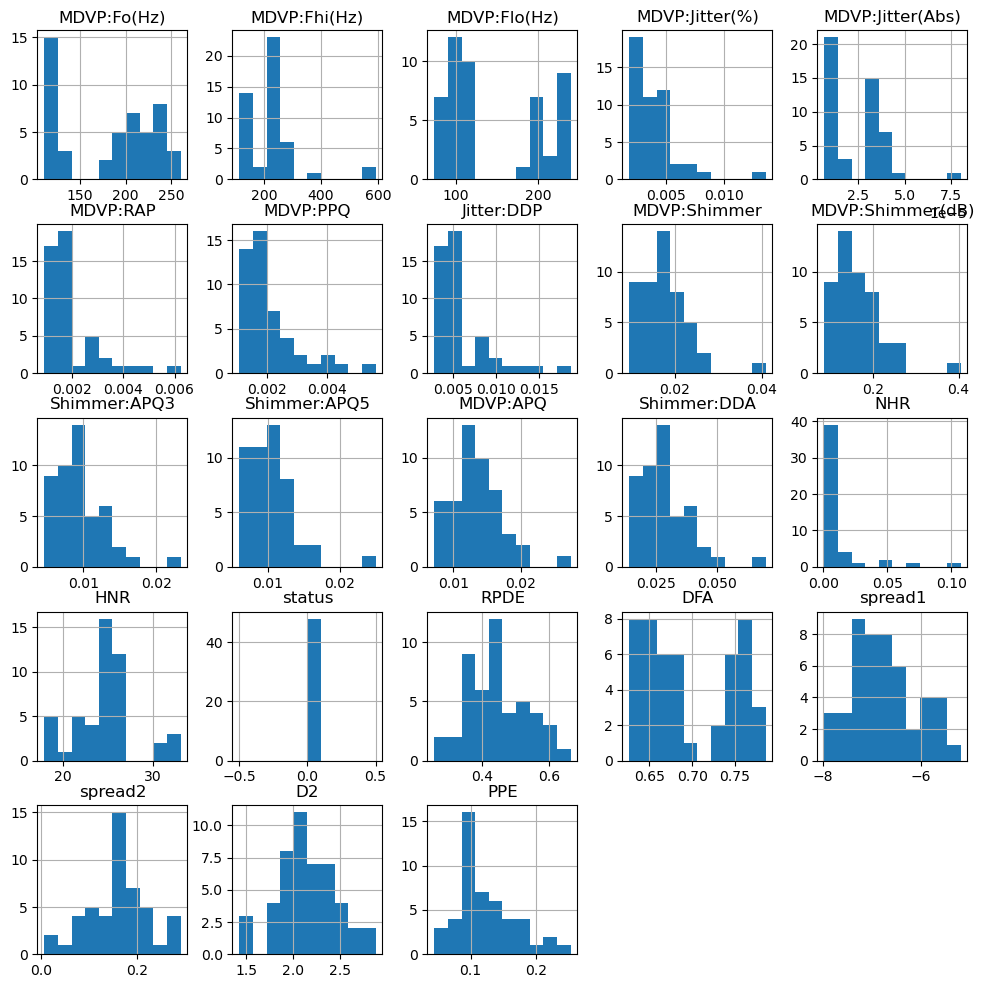

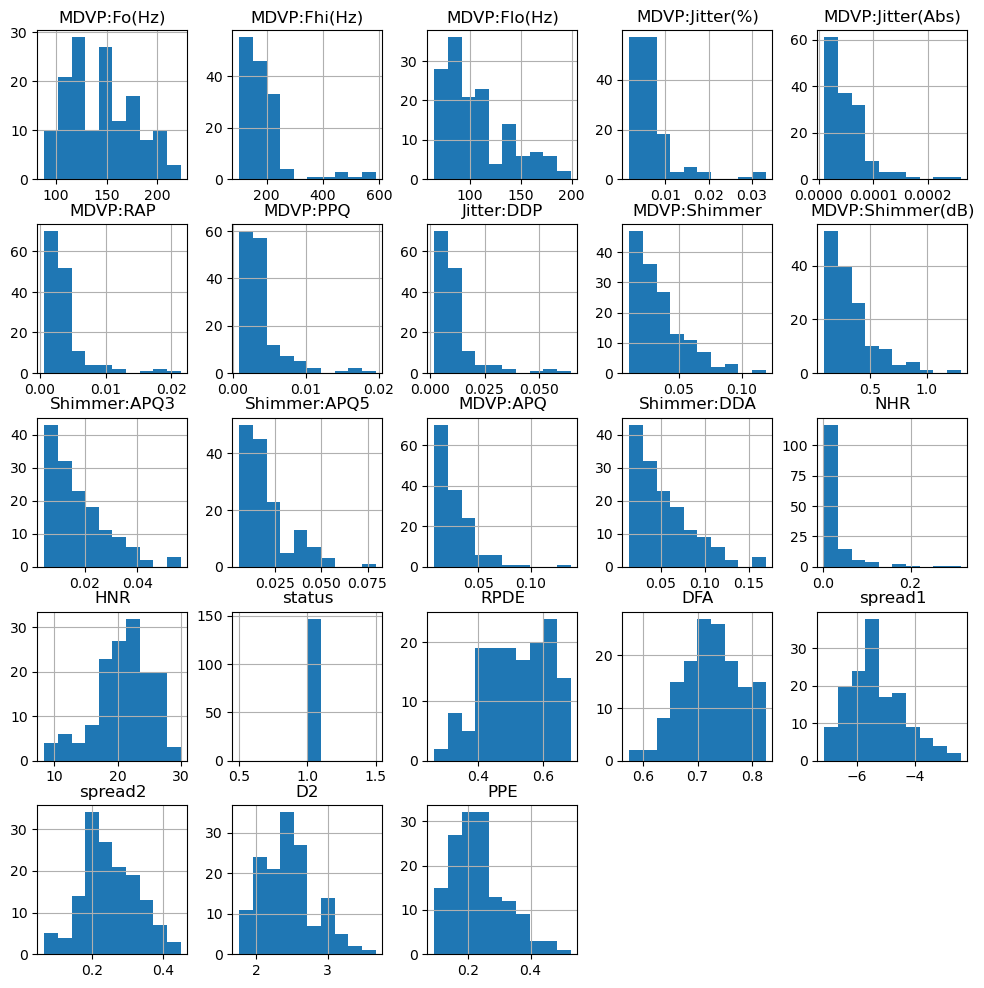

In [12]:
data.groupby('status').hist(figsize=(12, 12))

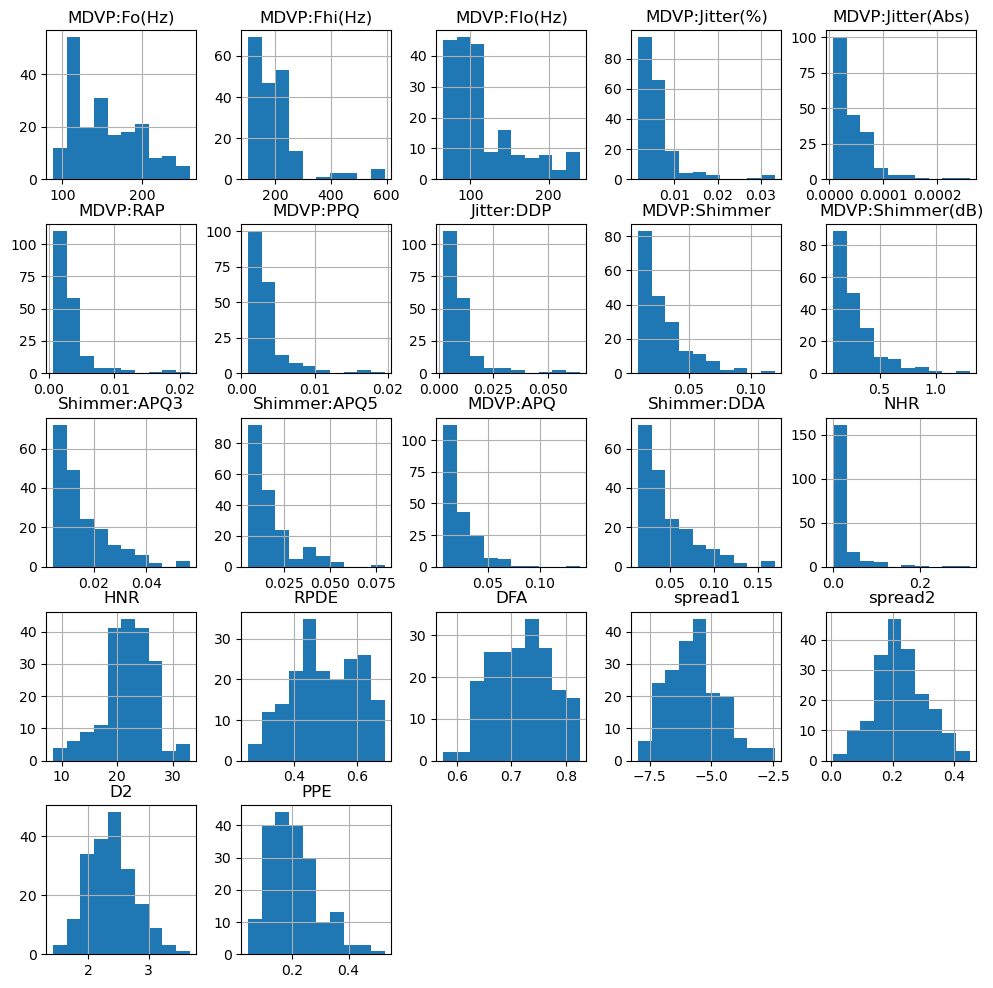

In [13]:


# plotting imports
import matplotlib.pyplot as plt

# analyze the features 
x1.hist(figsize=(12,12))
plt.show()



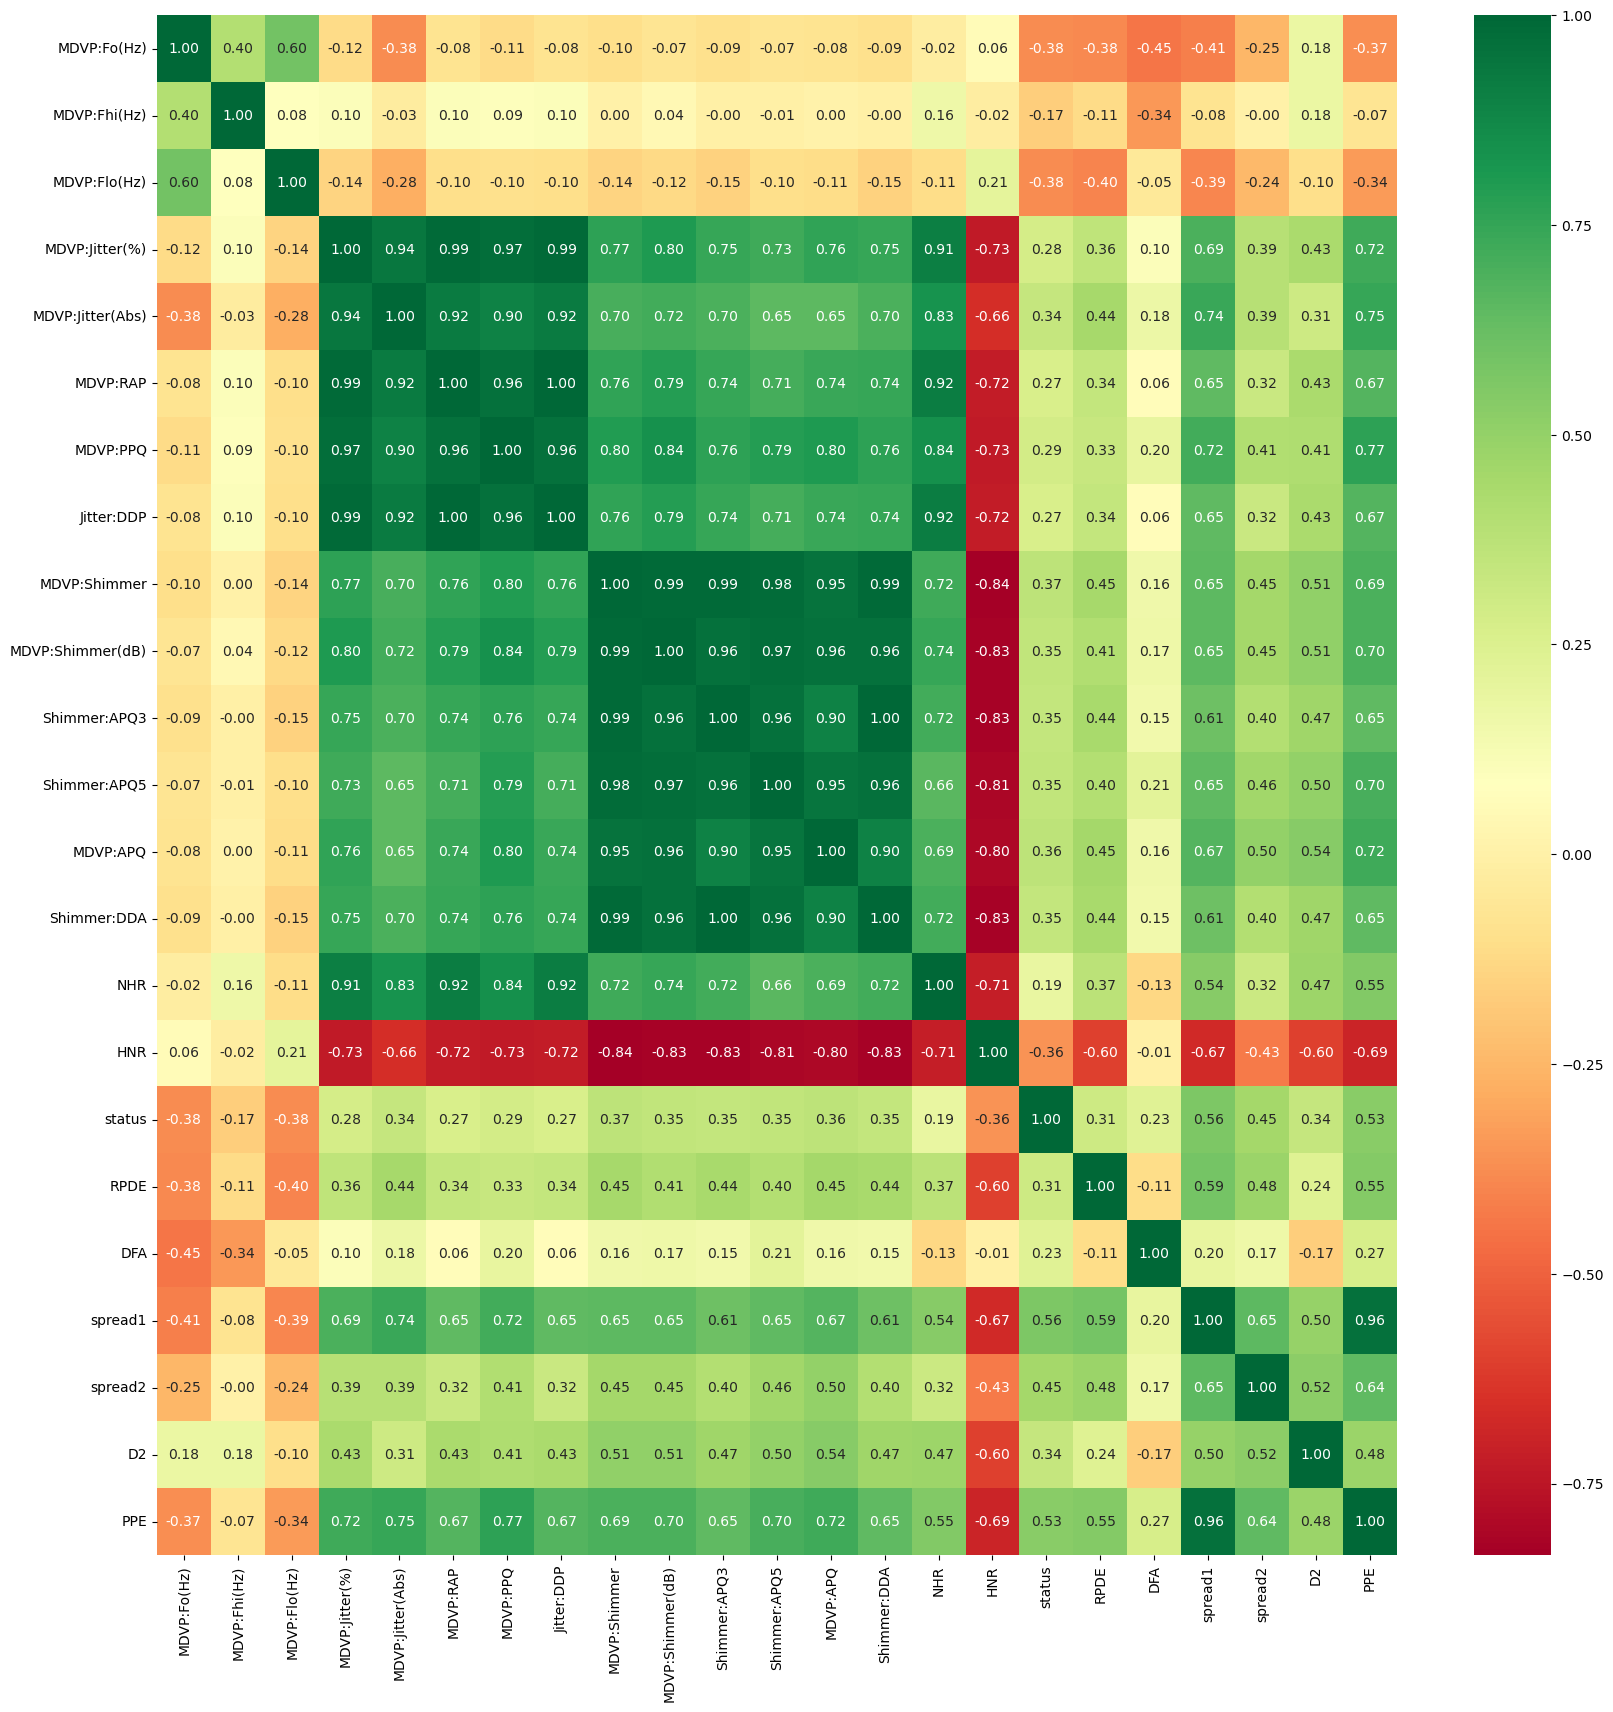

In [14]:
# plotting imports
import seaborn as sns

# figure size
plt.figure(figsize=(20, 20))

# correlation matrix
dataplot = sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap="RdYlGn")

In [15]:
#from pandas.plotting import scatter_matrix
#p=scatter_matrix(data,figsize=(25, 25))

#Encoding categorical data values 
from sklearn.preprocessing import LabelEncoder
#labelencoder_y = LabelEncoder()
#Y = labelencoder_y.fit_transform(y)



In [16]:


#importing train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=42, stratify=y)



In [17]:


from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,21):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))



In [18]:


## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))



Max train score 100.0 % and k = [1]


In [19]:

## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))



Max test score 89.23076923076924 % and k = [7, 8]


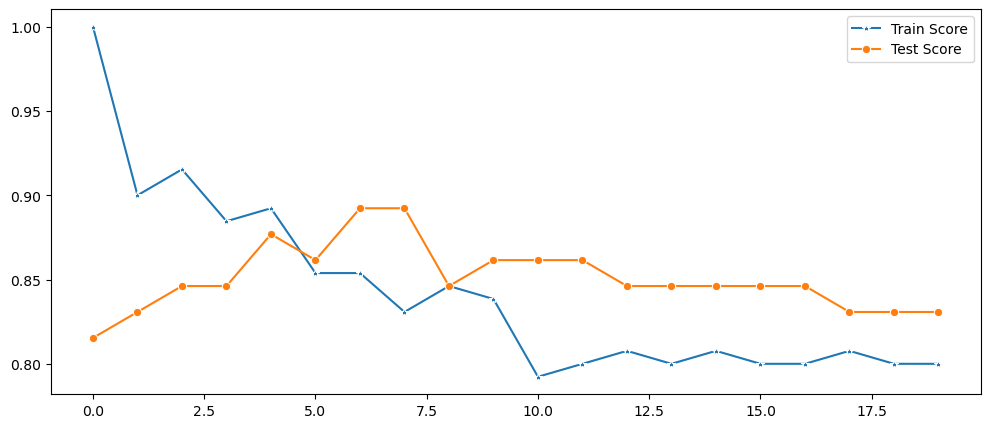

In [20]:
plt.figure(figsize=(12,5))
p = sns.lineplot(train_scores,marker='*',label='Train Score')
p = sns.lineplot(test_scores,marker='o',label='Test Score')

In [21]:


#Setup a knn classifier with k neighbors - The best result is captured at k = 7 hence 7 is used for the final model
#It was already provided in the max test
knn = KNeighborsClassifier(7)

knn.fit(x_train,y_train)
knn.score(x_test,y_test)



0.8923076923076924

In [22]:
#Different attempt with KNN using cancer algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier (n_neighbors = 7, metric = 'euclidean', p = 2)
classifier.fit(x_train, y_train)
print()

In [23]:


#importing train_test_split
from sklearn.model_selection import train_test_split

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)



In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 12, criterion = 'entropy', random_state = 42)
classifier2.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=12, random_state=42)

In [25]:


# Make predictions for the test set
from sklearn.metrics import confusion_matrix
y_pred_test = classifier2.predict(x_test)
cm = confusion_matrix(y_test, y_pred_test)



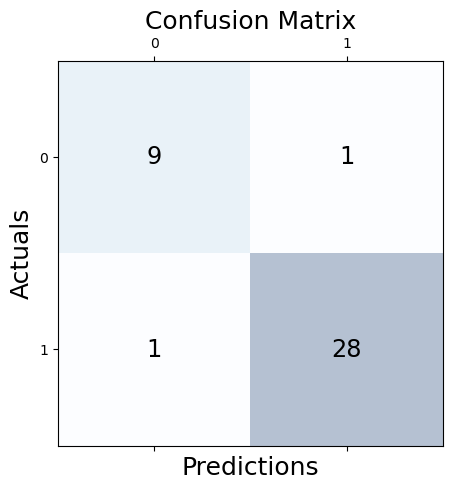

In [26]:


fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()



In [27]:
# Make predictions for the test set RF at n=12
y_pred_test = classifier2.predict(x_test)
cm2 = confusion_matrix(y_test, y_pred_test)
accuracy2= (cm2[0][0] + cm2[1][1]) / (cm2[0][0] + cm2[0][1] + cm2[1][0] + cm2[1][1])
print(accuracy2*100)

94.87179487179486


In [28]:
accuracy2*100

94.87179487179486

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 12, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=12, random_state=0)

In [30]:


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [31]:

# Make predictions for the test set
y_pred_test = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred_test)
accuracy1 = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])



In [32]:
accuracy1*100



89.74358974358975

In [33]:

from sklearn.svm import SVC
classifier1 = SVC(kernel = 'linear', random_state = 0)
classifier1.fit(x_train, y_train)
print()



In [34]:


from sklearn.metrics import confusion_matrix
y_pred_test = classifier1.predict(x_test)
cm1 = confusion_matrix(y_test, y_pred_test)
accuracy1 = (cm1[0][0] + cm1[1][1]) / (cm1[0][0] + cm1[0][1] + cm1[1][0] + cm1[1][1])



In [35]:
accuracy1*100

92.3076923076923

In [36]:


from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred_test)*100)


92.3076923076923


In [37]:


from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)
predict = model.predict(x_test)



In [38]:


# R^2

# train set
#print(f'Coeff. of determination on train set:{model.score(x_train, y_train): .2f}') 

# test set
#print(f'Coeff. of determination on test set:{model.score(x_test, y_test): .2f}')



In [39]:


# model metrics
from sklearn import metrics
import numpy as np

print(f'The Mean Absolute Error is:{metrics.mean_absolute_error(y_test, predict): .2f}')
print(f'The root Mean Squared Error is:{np.sqrt(metrics.mean_squared_error(y_test, predict)): .2f}')



The Mean Absolute Error is: 0.10
The root Mean Squared Error is: 0.32


In [40]:


from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predict)*100)



89.74358974358975


Text(0.5, 1.0, 'Output Confusion Matrix')

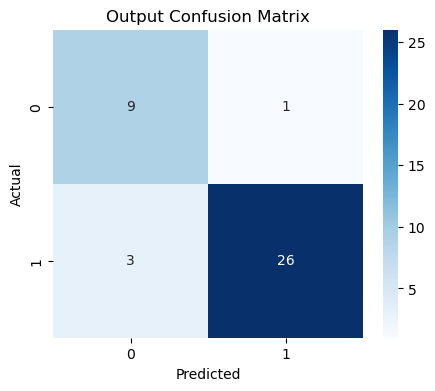

In [41]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test ,predict)
plt.figure(figsize=(5,4))

fg=sns.heatmap(cm,annot=True,cmap="Blues")
figure=fg.get_figure()

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title("Output Confusion Matrix")

In [42]:
pd.DataFrame({'Actual': y_test, 'Predict': predict})

,Actual,Predict
0,1,1
1,1,0
2,0,0
3,1,1
4,0,1
5,1,1
6,1,0
7,1,1
8,1,1
9,1,1


In [43]:


#Fitting Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)



DecisionTreeClassifier(criterion='entropy', random_state=0)

In [44]:
print(accuracy_score(y_test, predict)*100)

89.74358974358975


In [45]:


#Fitting Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)



RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [46]:


plt.show()



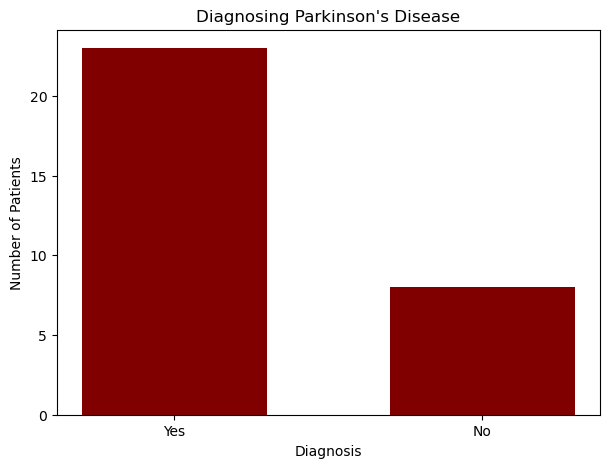

In [47]:


import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
bar = {'Yes':23, 'No': 8}
diag = list(bar.keys())
values = list(bar.values())
  
fig = plt.figure(figsize = (7, 5))
 
# creating the bar plot
plt.bar(diag, values, align = 'center', color ='maroon',
        width = 0.6)
 
plt.xlabel("Diagnosis")
plt.ylabel("Number of Patients")
plt.title("Diagnosing Parkinson's Disease")
plt.show()

